In [5]:
! pip install PyPDF2 pdfplumber transformers langchain chromadb openai streamlit matplotlib


In [6]:
import pdfplumber
import os
import re

In [7]:
def extract_text_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

In [8]:
def clean_text(text):
    text = re.sub(r'\n+', '\n', text)          # Remove multiple newlines
    text = re.sub(r'Page \d+ of \d+', '', text) # Remove headers/footers (like "Page 1 of 10")
    return text.strip()

In [9]:
pdf_dir = "data"
for file in os.listdir(pdf_dir):
    if file.endswith(".pdf"):
        raw_text = extract_text_pdf(os.path.join(pdf_dir, file))
        cleaned_text = clean_text(raw_text)
        print(f"\n--- Extracted from {file} ---\n")
        print(cleaned_text[:500])  # Show first 500 chars

        # Save to .txt for later use
        with open(f"{file.replace('.pdf', '')}_cleaned.txt", "w", encoding="utf-8") as f:
            f.write(cleaned_text)



--- Extracted from apple_10k.pdf ---

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 30, 2023
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdi

--- Extracted from microsoft_10k.pdf ---

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF
1934
For the Fiscal Year Ended June 30, 2024
OR
TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF
☐ 1934
For the Transition Period From to
Commission File Number 001-37845
MICROSOFT CORPORATION
WASHINGTON 91-1144442
(ST

In [10]:
! pip install openai

In [11]:
! pip install torch transformers

In [12]:
! pip install pandas numpy PyMuPDF

In [13]:
import torch
import transformers
print(torch.__version__)
print(transformers.__version__)

c:\Users\singh\Downloads\Finance_summarizer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.7.1+cpu
4.54.0


In [14]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


Device set to use cpu


In [15]:
with open("apple_10k_cleaned.txt", "r", encoding="utf-8") as f:
    apple_text = f.read()

print("Text loaded successfully!")
print(apple_text[:1000])


Text loaded successfully!
UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 30, 2023
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdiction (I.R.S. Employer Identification No.)
of incorporation or organization)
One Apple Park Way
Cupertino, California 95014
(Address of principal executive offices) (Zip Code)
(408) 996-1010
(Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each class Trading symbol(s) Name of each exchange on which registered
Common Stock, $0.00001 par value per share AAPL The Nasdaq Stock Market LLC
1.375% Notes d

In [16]:
chunks = [apple_text[i:i+1000] for i in range(0, len(apple_text), 1000)]
print(f" Total chunks created: {len(chunks)}")


 Total chunks created: 269


In [17]:
summaries = []

for idx, chunk in enumerate(chunks[:3]):
    print(f"\n🔄 Summarizing chunk {idx+1}/{len(chunks)}...")
    result = summarizer(chunk, max_length=200, min_length=50, do_sample=False)
    summaries.append(result[0]['summary_text'])

final_summary = "\n\n".join(summaries)
print("\n Summarization complete!")



🔄 Summarizing chunk 1/269...

🔄 Summarizing chunk 2/269...

🔄 Summarizing chunk 3/269...

 Summarization complete!


In [18]:
print("===  Final AI Summary ===\n")
print(final_summary)


===  Final AI Summary ===

Apple Inc. is a U.S. publicly traded company. The Nasdaq Stock Market LLC is a member of the Nasdaq. The company's common stock is traded under the symbol "AAPL" The company has issued 1.375% Notes due 2024. The notes are due 2024 and are being offered on the NasDAQ Stock Market.

Securities registered pursuant to Section 12(g) of the Act: None. Indicate by check mark if the Registrant is a well-known seasoned issuer, as defined in Rule 405 of the Securities Act. The Nasdaq Stock Market LLC is a member of the New York Stock Exchange.

Indicate whether the Registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§232.405 of this chapter) during the preceding 12 months. Indicate by check mark whether the registrant is a large accelerated filer, an accelerated filers, a non-accelerated filer or an emerging growth company.


In [19]:
sections = final_summary.split("\n\n")
print("📌 Company Overview:\n", sections[0], "\n")
if len(sections) > 1:
    print("📊 Key Financial Highlights:\n", sections[1], "\n")
if len(sections) > 2:
    print("⚠️ Risk Factors:\n", sections[2])


📌 Company Overview:
 Apple Inc. is a U.S. publicly traded company. The Nasdaq Stock Market LLC is a member of the Nasdaq. The company's common stock is traded under the symbol "AAPL" The company has issued 1.375% Notes due 2024. The notes are due 2024 and are being offered on the NasDAQ Stock Market. 

📊 Key Financial Highlights:
 Securities registered pursuant to Section 12(g) of the Act: None. Indicate by check mark if the Registrant is a well-known seasoned issuer, as defined in Rule 405 of the Securities Act. The Nasdaq Stock Market LLC is a member of the New York Stock Exchange. 

⚠️ Risk Factors:
 Indicate whether the Registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§232.405 of this chapter) during the preceding 12 months. Indicate by check mark whether the registrant is a large accelerated filer, an accelerated filers, a non-accelerated filer or an emerging growth company.


In [20]:
! pip install langchain chromadb sentence-transformers

In [21]:
! pip install -U langchain-community

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document
import os

In [23]:
with open("apple_10k_cleaned.txt","r",encoding="utf-8") as f:
    apple_text=f.read()
print(apple_text[:500]);

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 30, 2023
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdi


In [24]:
splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
chunks=splitter.split_text(apple_text)
print(f" Total chunks created: {len(chunks)}")

 Total chunks created: 341


In [25]:
docs=[Document(page_content=chunk) for chunk in chunks]
print(f"Prepared {len(docs)} documents for embedding")

Prepared 341 documents for embedding


In [26]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
print(" Embedding model loaded.")

C:\Users\singh\AppData\Local\Temp\ipykernel_6092\1764097625.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


 Embedding model loaded.


In [27]:
db = Chroma.from_documents(docs, embeddings, persist_directory="chroma_db")
print(" Stored chunks in Chroma vector database.")

c:\Users\singh\Downloads\Finance_summarizer\.venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


 Stored chunks in Chroma vector database.


In [28]:
query = "Summarize the Risk Factors mentioned in this report."
retrieved_docs = db.similarity_search(query, k=3) 

print(" Retrieved Relevant Chunks:\n")
for i, doc in enumerate(retrieved_docs, 1):
    print(f"Chunk {i}:\n{doc.page_content}\n")


 Retrieved Relevant Chunks:

Chunk 1:
operations, financial condition and stock price can be materially and adversely affected.
Because of the following factors, as well as other factors affecting the Company’s results of operations and financial condition, past financial performance should
not be considered to be a reliable indicator of future performance, and investors should not use historical trends to anticipate results or trends in future periods.
This discussion of risk factors contains forward-looking statements.
This section should be read in conjunction with Part II, Item 7, “Management’s Discussion and Analysis of Financial Condition and Results of Operations” and the
consolidated financial statements and accompanying notes in Part II, Item 8, “Financial Statements and Supplementary Data” of this Form 10-K.
Macroeconomic and Industry Risks
The Company’s operations and performance depend significantly on global and regional economic conditions and adverse economic conditions 

In [29]:
context = " ".join([doc.page_content for doc in retrieved_docs])
summary = summarizer(context, max_length=200, min_length=50, do_sample=False)
print("\n===  Final Query Answer ===\n")
print(summary[0]['summary_text'])


===  Final Query Answer ===

The Company’s operations and performance depend significantly on global and regional economic conditions. operations, financial condition and stock price can be materially and adversely affected. Past financial performance should not be considered to be a reliable indicator of future performance, and investors should not use historical trends to anticipate results or trends in future periods.


In [30]:
! pip install pandas matplotlib

In [31]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
with open("apple_10k_cleaned.txt","r",encoding="utf-8") as f:
    apple_text=f.read()
print(apple_text[:500])

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 30, 2023
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdi


In [36]:
! pip install spacy transformers

   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.9 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/13.9 MB 3.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.9 MB 2.9 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/13.9 MB 2.9 MB/s eta 0:00:05
   ------- -------------------------------- 2.6/13.9 MB 2.6 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/13.9 MB 2.4 MB/s eta 0:00:05
   ---------- ----------------------------- 3.7/13.9 MB 2.5 MB/s eta 0:00:05
   ------------ --------------------------- 4.2/13.9 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 4.7/13.9 MB 2.6 MB/s eta 0:00:04
   --------------- ------------------------ 5.2/13.9 MB 2.5 MB/s eta 0:00:04
   ---------------- ----------------------- 5.8/13.9 MB 2.6 MB/s eta 0:00:04
   ------------------ --------------------- 6.6/13.9 MB 2.6 MB/s eta 0:00:03
   ---

In [37]:
! python -m spacy download en_core_web_trf

     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     ---------------------------------------- 0.8/457.4 MB 5.1 MB/s eta 0:01:30
     ---------------------------------------- 2.1/457.4 MB 5.5 MB/s eta 0:01:24
     ---------------------------------------- 3.7/457.4 MB 5.8 MB/s eta 0:01:18
     ---------------------------------------- 5.2/457.4 MB 6.3 MB/s eta 0:01:13
      --------------------------------------- 6.3/457.4 MB 6.4 MB/s eta 0:01:11
      --------------------------------------- 7.6/457.4 MB 6.1 MB/s eta 0:01:14
      --------------------------------------- 9.2/457.4 MB 6.3 MB/s eta 0:01:12
      -------------------------------------- 10.7/457.4 MB 6.4 MB/s eta 0:01:10
     - ------------------------------------- 12.3/457.4 MB 6.5 MB/s eta 0:01:09
     - ------------------------------------- 13.9/457.4 MB 6.6 MB/s eta 0:01:08
     - ------------------------------------- 15.5/457.4 MB 6.7 MB/s eta 0:01:07
     - ------------------------------------- 16

In [48]:
! pip install spacy transformers torch
! python -m spacy download en_core_web_trf

     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/457.4 MB ? eta -:--:--
     -------------------------------------- 0.5/457.4 MB 947.7 kB/s eta 0:08:03
     -------------------------------------- 0.8/457.4 MB 915.9 kB/s eta 0:08:19
     -------------------------------------- 0.8/457.4 MB 915.9 kB/s eta 0:08:19
     -------------------------------------- 1.0/457.4 MB 908.8 kB/s eta 0:08:23
     -------------------------------------- 1.3/457.4 MB 934.4 kB/s eta 0:08:09
     -------------------------------------- 1.6/457.4 MB 958.7 kB/s eta 0:07:56
     -------------------------------------- 1.8/457.4 MB 983.4 kB/s eta 0:07:44
     -------------------------------------- 2.1/457.4 MB 998.9 kB/s eta 0:07:36
     ---------------------------------------- 2.4/457.4 MB 1.0 MB/s eta 0:07:18
     ---------------------------------------- 2.6/457.4 MB 1.

In [56]:
! pip install spacy transformers torch matplotlib
! python -m spacy download en_core_web_trf

     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/457.4 MB ? eta -:--:--
     ---------------------------------------- 0.8/457.4 MB 2.5 MB/s eta 0:03:05
     ---------------------------------------- 1.6/457.4 MB 2.8 MB/s eta 0:02:41
     ---------------------------------------- 2.4/457.4 MB 3.1 MB/s eta 0:02:29
     ---------------------------------------- 2.6/457.4 MB 2.9 MB/s eta 0:02:39
     ---------------------------------------- 3.4/457.4 MB 2.9 MB/s eta 0:02:36
     ---------------------------------------- 4.2/457.4 MB 3.0 MB/s eta 0:02:31
     ---------------------------------------- 5.0/457.4 MB 3.0 MB/s eta 0:02:29
     ---------------------------------------- 5.5/457.4 MB 3.1 MB/s eta 0:02:27
      --------------------------------------- 6.3/457.4 MB 3.1 MB/s eta 0:02:27
      --------------------------------------- 6.8/457.4 MB 3.1 MB/s eta 0:02:26
      --------------------------------------- 7.6/457.

In [65]:
! pip install spacy transformers torch matplotlib
! python -m spacy download en_core_web_trf

     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     --------------------------------------- 2.1/457.4 MB 11.6 MB/s eta 0:00:40
     --------------------------------------- 4.7/457.4 MB 11.6 MB/s eta 0:00:39
      -------------------------------------- 7.1/457.4 MB 11.7 MB/s eta 0:00:39
      -------------------------------------- 9.7/457.4 MB 11.6 MB/s eta 0:00:39
      ------------------------------------- 11.8/457.4 MB 11.7 MB/s eta 0:00:38
     - ------------------------------------ 13.9/457.4 MB 11.1 MB/s eta 0:00:41
     - ------------------------------------ 15.7/457.4 MB 10.6 MB/s eta 0:00:42
     - ------------------------------------ 17.3/457.4 MB 10.3 MB/s eta 0:00:43
     - ------------------------------------ 19.1/457.4 MB 10.0 MB/s eta 0:00:44
     - ------------------------------------- 20.4/457.4 MB 9.6 MB/s eta 0:00:46
     - ------------------------------------- 22.5/457.4 MB 9.7 MB/s eta 0:00:45
     -- ------------------------------------ 24

In [66]:
import spacy
from transformers import pipeline
import re
import matplotlib.pyplot as plt


In [67]:
nlp = spacy.load("en_core_web_trf")
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")  # QA

Device set to use cpu


In [83]:
with open("apple_10k_cleaned.txt", "r", encoding="utf-8") as f:
    apple_text = f.read()
print(apple_text[:500]) 

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the fiscal year ended September 30, 2023
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from to .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdi



🔍 Extracting Net Income...

🔍 Extracting Revenue...

🔍 Extracting EPS...

 Final Extracted Metrics:
Net Income: 97.0 billion
Revenue: 37.0 billion
EPS: 6.16 


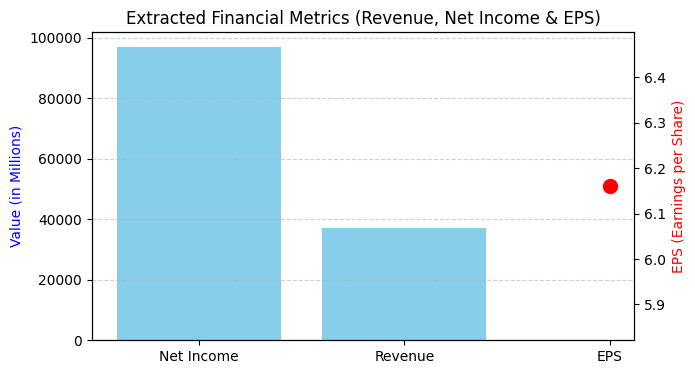

In [85]:
import re
import matplotlib.pyplot as plt

# --- Revenue & Net Income Extraction ---
metrics = {
    "Net Income": "net income"
}

results = {}

# Extract Net Income (Regex + QA fallback)
for metric, keyword in metrics.items():
    print(f"\n🔍 Extracting {metric}...")
    ctx = find_context(keyword, apple_text, window=400)

    # Step 1: Regex
    value, unit = extract_value_with_unit(keyword, ctx)

    # Step 2: QA fallback
    if not value:
        qa_ans = qa_pipeline(question=f"What is the {metric.lower()} for 2023?", context=ctx)['answer']
        num = re.findall(r"\d+\.\d+", qa_ans)
        if num:
            value = float(num[0])
            _, unit = extract_value_with_unit(keyword, ctx)

    results[metric] = (value if value else "Not Found", unit if unit else None)

# --- Expanded Revenue Handling ---
print("\n🔍 Extracting Revenue...")
revenue_keywords = ["revenue", "total revenue", "net sales", "total sales"]

value, unit = None, None
for kw in revenue_keywords:
    ctx = find_context(kw, apple_text, window=400)
    value, unit = extract_value_with_unit(kw, ctx)
    if value:
        break

if not value:
    for kw in revenue_keywords:
        ctx = find_context(kw, apple_text, window=400)
        qa_ans = qa_pipeline(question="What is the revenue for 2023?", context=ctx)['answer']
        num = re.findall(r"\d+\.\d+", qa_ans)
        if num:
            value = float(num[0])
            _, unit = extract_value_with_unit(kw, ctx)
            break

if value and not unit:
    unit = "billion"

results["Revenue"] = (value if value else "Not Found", unit)
print("\n🔍 Extracting EPS...")
eps_pattern = r"(?:EPS|Earnings per share)[^\d]*(\d+\.\d+)"
eps_match = re.findall(eps_pattern, apple_text, flags=re.IGNORECASE)

if eps_match:
    eps_value = float(eps_match[0])
else:
    eps_ctx = find_context("earnings per share", apple_text, window=200)
    eps_ans = qa_pipeline(question="What is the EPS for 2023?", context=eps_ctx)['answer']
    eps_num = re.findall(r"\d+\.\d+", eps_ans)
    eps_value = float(eps_num[0]) if eps_num else "Not Found"

results["EPS"] = (eps_value, None)

# --- Auto Unit Inference ---
for metric in ["Revenue", "Net Income"]:
    if results[metric][1] is None and results[metric][0] != "Not Found":
        results[metric] = (results[metric][0], "billion")

print("\n Final Extracted Metrics:")
for k, v in results.items():
    print(f"{k}: {v[0]} {v[1] if v[1] else ''}")
converted_metrics = {}
eps_val = None

for k, (val, unit) in results.items():
    if val == "Not Found":
        continue
    if k == "EPS":
        eps_val = val
    elif unit == "billion":
        converted_metrics[k] = val * 1_000  
    elif unit == "million":
        converted_metrics[k] = val

fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.bar(converted_metrics.keys(), converted_metrics.values(), color='skyblue')
ax1.set_ylabel("Value (in Millions)", color="blue")
ax1.set_title("Extracted Financial Metrics (Revenue, Net Income & EPS)")
ax1.grid(axis="y", linestyle="--", alpha=0.6)

if eps_val and eps_val != "Not Found":
    ax2 = ax1.twinx()
    ax2.plot(["EPS"], [eps_val], color="red", marker="o", markersize=10)
    ax2.set_ylabel("EPS (Earnings per Share)", color="red")

plt.show()
